In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [35]:
dataset = pd.read_csv('Costco.csv', encoding='unicode_escape')

In [36]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [37]:
data = dataset.copy()

In [38]:
data = data[['Order Date', 'Sales', 'Profit']]

In [39]:
data

,Order Date,Sales,Profit
0,11/8/2016,261.9600,41.9136
1,11/8/2016,731.9400,219.5820
2,10/11/2015,957.5775,-383.0310
3,6/9/2014,48.8600,14.1694
4,6/9/2014,1706.1840,85.3092
...,...,...,...
2116,3/19/2015,383.4656,-67.6704
2117,12/5/2016,13.4000,6.4320
2118,9/6/2015,85.9800,22.3548
2119,1/21/2014,25.2480,4.1028


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
 2   Profit      2121 non-null   float64
dtypes: float64(2), object(1)
memory usage: 49.8+ KB


In [41]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [42]:
data['sale_month'] = data['Order Date'].dt.month

In [43]:
data['sale_year'] = data['Order Date'].dt.year

In [44]:
data.head()

,Order Date,Sales,Profit,sale_month,sale_year
0,2016-11-08,261.9600,41.9136,11,2016
1,2016-11-08,731.9400,219.5820,11,2016
2,2015-10-11,957.5775,-383.0310,10,2015
3,2014-06-09,48.8600,14.1694,6,2014
4,2014-06-09,1706.1840,85.3092,6,2014


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
 2   Profit      2121 non-null   float64       
 3   sale_month  2121 non-null   int64         
 4   sale_year   2121 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 83.0 KB


In [46]:
data = data.groupby(['sale_year', 'sale_month']).agg({'Sales': np.sum, 'Profit': np.sum}).reset_index().sort_values(by = ['sale_year', 'sale_month'])

In [47]:
data

,sale_year,sale_month,Sales,Profit
0,2014,1,6242.5250,805.4665
1,2014,2,1839.6580,120.6917
2,2014,3,14573.9560,-1128.6550
3,2014,4,7944.8370,554.3801
4,2014,5,6912.7870,-349.8776
5,2014,6,13206.1256,596.3153
6,2014,7,10821.0510,374.2467
7,2014,8,7320.3465,663.4717
8,2014,9,23816.4808,1858.5976
9,2014,10,12304.2470,249.1645


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_year   48 non-null     int64  
 1   sale_month  48 non-null     int64  
 2   Sales       48 non-null     float64
 3   Profit      48 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.9 KB


In [49]:
lst1 = []
lst2 = []
for value in data['sale_year']:
    lst1.append(str(value))
    
for value in data['sale_month']:
    lst2.append(str(value))



lst_date = []
for index in range(0, len(lst1)):
    date = lst1[index] + '-' + lst2[index]
    lst_date.append(date)

data['order_date'] = pd.Series(lst_date)

In [50]:
data.head()

,sale_year,sale_month,Sales,Profit,order_date
0,2014,1,6242.525,805.4665,2014-1
1,2014,2,1839.658,120.6917,2014-2
2,2014,3,14573.956,-1128.6550,2014-3
3,2014,4,7944.837,554.3801,2014-4
4,2014,5,6912.787,-349.8776,2014-5


In [51]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sale_year   48 non-null     int64         
 1   sale_month  48 non-null     int64         
 2   Sales       48 non-null     float64       
 3   Profit      48 non-null     float64       
 4   order_date  48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.2 KB


In [53]:
data.head()

,sale_year,sale_month,Sales,Profit,order_date
0,2014,1,6242.525,805.4665,2014-01-01
1,2014,2,1839.658,120.6917,2014-02-01
2,2014,3,14573.956,-1128.6550,2014-03-01
3,2014,4,7944.837,554.3801,2014-04-01
4,2014,5,6912.787,-349.8776,2014-05-01


In [54]:
data.drop(['sale_year', 'sale_month'], axis = 1, inplace = True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sales       48 non-null     float64       
 1   Profit      48 non-null     float64       
 2   order_date  48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.5 KB


In [56]:
data.set_index('order_date', inplace = True)

In [57]:
data

,Sales,Profit
order_date,,
2014-01-01,6242.5250,805.4665
2014-02-01,1839.6580,120.6917
2014-03-01,14573.9560,-1128.6550
2014-04-01,7944.8370,554.3801
2014-05-01,6912.7870,-349.8776
2014-06-01,13206.1256,596.3153
2014-07-01,10821.0510,374.2467
2014-08-01,7320.3465,663.4717
2014-09-01,23816.4808,1858.5976


<AxesSubplot:xlabel='order_date'>

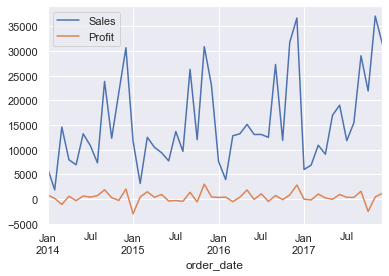

In [58]:
data.plot()

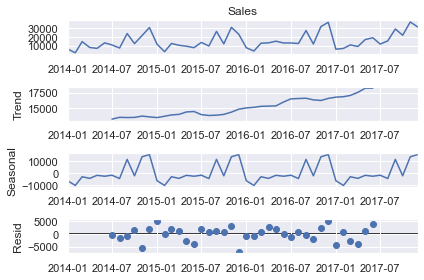

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

In [60]:
# upward trend
# seasonality also present as we can see a pattern
# irregualar data points also exists

In [61]:
# Check whether autocorrelation there in the dataset or not ?

# if auto correlation does not exists, then use linear regression
# if auto correlation value is 2 then there is no auto correlation
# if auto correlation value < 2 then positive auto correlation exists
# if auto correlation value > 2 then negative auto correlation exists

import statsmodels.api as sm
sm.stats.durbin_watson(data['Sales']) # Positive Autocorrelation found 

0.33455255693627645

In [62]:
from statsmodels.tsa.stattools import adfuller
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']
    
    for a, b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is Non-Stationary") 

In [63]:
adf_check(data['Sales'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -4.699026242828903
p-value : 8.450793985809654e-05
#Lags : 0
No. of obs : 47
Strong evidence against null hypothesis and my timeseries is Stationary


In [64]:
# Trend  (p, d, q)
# Seasonality (P, D, Q)

# Trend
# d = 0 (0 times we did differencing)

In [65]:
data['sales_seasonality'] = data['Sales'] - data['Sales'].shift(12)

In [66]:
data

,Sales,Profit,sales_seasonality
order_date,,,
2014-01-01,6242.5250,805.4665,NaN
2014-02-01,1839.6580,120.6917,NaN
2014-03-01,14573.9560,-1128.6550,NaN
2014-04-01,7944.8370,554.3801,NaN
2014-05-01,6912.7870,-349.8776,NaN
2014-06-01,13206.1256,596.3153,NaN
2014-07-01,10821.0510,374.2467,NaN
2014-08-01,7320.3465,663.4717,NaN
2014-09-01,23816.4808,1858.5976,NaN


In [67]:
adf_check(data['sales_seasonality'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -6.373182378902405
p-value : 2.3179143714662938e-08
#Lags : 0
No. of obs : 35
Strong evidence against null hypothesis and my timeseries is Stationary


In [68]:
# Seasonality D = 1 (only one time we did difference)

# moving average method could also have been used but it results in hig variance in values.
# we need to consider a window of size >= 2, ans then find the average of all values
# in that window. Due to this, there may exist varied data

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1440x1440 with 0 Axes>

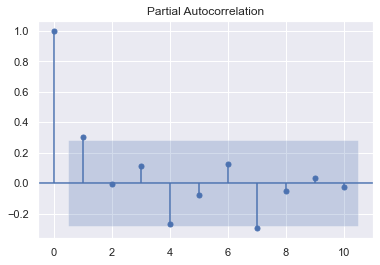

In [70]:
plt.figure(figsize = (20, 20))
plot_pacf(data['Sales'].dropna(), lags=10)
plt.show()

<Figure size 1440x1440 with 0 Axes>

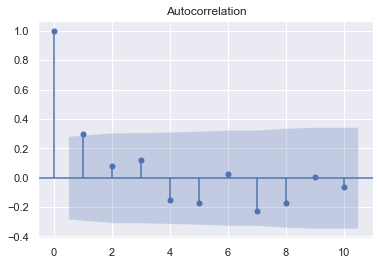

In [71]:
plt.figure(figsize = (20, 20))
plot_acf(data['Sales'].dropna(), lags=10)
plt.show()

In [72]:
# p = q = 1

<Figure size 3600x1440 with 0 Axes>

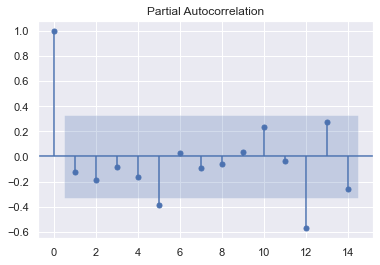

In [73]:
plt.figure(figsize = (50, 20))
plot_pacf(data['sales_seasonality'].dropna(), lags=14)
plt.show()

<Figure size 3600x1440 with 0 Axes>

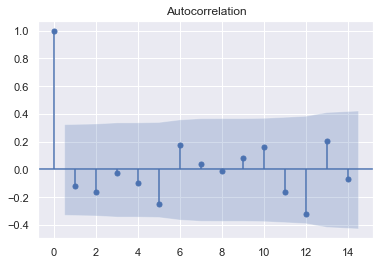

In [74]:
plt.figure(figsize = (50, 20))
plot_acf(data['sales_seasonality'].dropna(), lags=14)
plt.show()

In [75]:
# P = Q = 0

In [76]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# (p, q, d) - (1, 1, 0) - Trend
# (P, Q, D) - (0, 0, 1) - Seasonality

In [77]:
model = sm.tsa.statespace.SARIMAX(data['Sales'], order = (1,0,1), seasonal_order=(0,1,0,12))
result = model.fit()
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                -352.561
Date:                             Tue, 19 Sep 2023   AIC                            711.122
Time:                                     16:47:11   BIC                            715.872
Sample:                                 01-01-2014   HQIC                           712.780
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.006    169.354      0.000       0.988       1.012
ma.L1         -0.9997      

In [78]:
len(data)

48

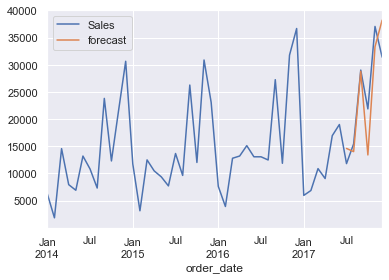

In [79]:
data['forecast'] = result.predict(start = 42, end = 48, dynamic=True)
data[['Sales','forecast']].plot()
plt.show()

In [80]:
from pandas.tseries.offsets import DateOffset

In [81]:
future_dates = [data.index[-1] + DateOffset(months=x) for x in range(61)]

In [82]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [83]:
future_data = pd.concat([data, future_dates_df])

In [84]:
len(future_data)

108

In [85]:
future_data

,Sales,Profit,sales_seasonality,forecast
2014-01-01,6242.5250,805.4665,NaN,NaN
2014-02-01,1839.6580,120.6917,NaN,NaN
2014-03-01,14573.9560,-1128.6550,NaN,NaN
2014-04-01,7944.8370,554.3801,NaN,NaN
2014-05-01,6912.7870,-349.8776,NaN,NaN
2014-06-01,13206.1256,596.3153,NaN,NaN
2014-07-01,10821.0510,374.2467,NaN,NaN
2014-08-01,7320.3465,663.4717,NaN,NaN
2014-09-01,23816.4808,1858.5976,NaN,NaN
2014-10-01,12304.2470,249.1645,NaN,NaN


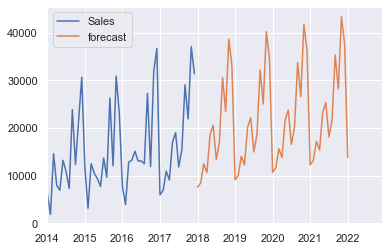

In [86]:
future_data['forecast'] = result.predict(start=48, end=96, dynamic=True)
future_data[['Sales','forecast']].plot()
plt.show()

In [87]:
future_data.to_csv("Final_Costco_sales_forecasting_5_Years.csv")

In [88]:
data.head()

,Sales,Profit,sales_seasonality,forecast
order_date,,,,
2014-01-01,6242.525,805.4665,NaN,NaN
2014-02-01,1839.658,120.6917,NaN,NaN
2014-03-01,14573.956,-1128.6550,NaN,NaN
2014-04-01,7944.837,554.3801,NaN,NaN
2014-05-01,6912.787,-349.8776,NaN,NaN


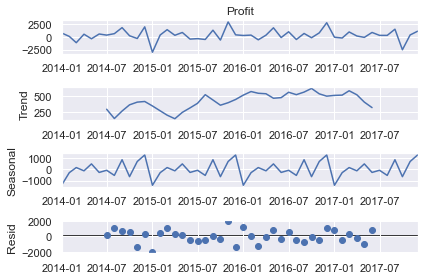

In [89]:
decomposition = seasonal_decompose(data['Profit'], model='additive', period=12)
decomposition.plot()
plt.show()

In [90]:
sm.stats.durbin_watson(data['Profit'])

2.286556681074766